In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from copy import deepcopy

In [23]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
#model_new = deepcopy(model)

In [24]:
from estimation import *

In [25]:
#est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
est_par = ['gamma', 'sigma', 'N', 'cost1', 'cost2', 'welfare', 'type_shares1'] # Parameters to estimate
theta0 = [0.9, 0.1, 10, 100, 300, 100, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0,45), (0.0,500,0), (0.0,500,0), (0.0,114/675), (0.0,1.0)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds,weight=False)


In [26]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0012
Parameters:              0.028, 1.512, 10.324, 151.122, 358.318, 0.169, 0.133
Number of iterations:    935


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


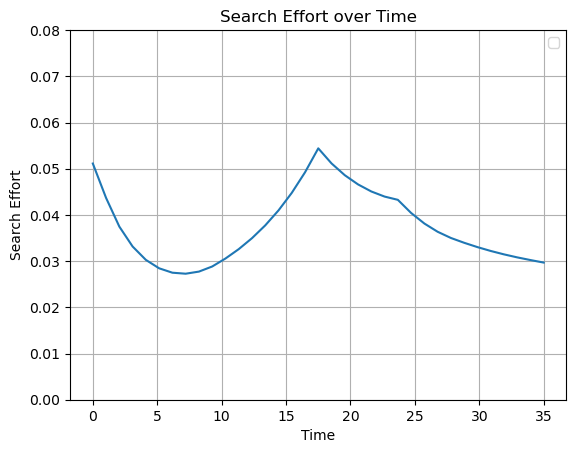

In [27]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [28]:
model.par.b1 = 342.0/675.0
model.par.b2 = 171.0/675.0

model.allocate()
s_forecast = model.solve()



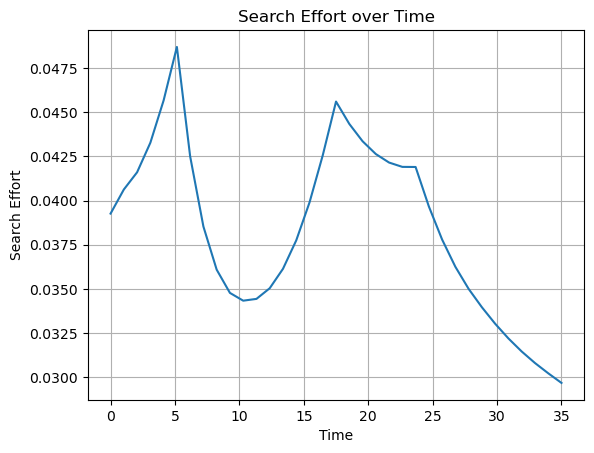

In [29]:
# Now plotting s_forecast
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, s_forecast, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [30]:
true_data = model.data.moments_after
print(np.shape(true_data))
print(np.shape(s_forecast))
# Get the mean square errors
mse_eta1 = np.mean((true_data - s_forecast)**2)
print(mse_eta1)

(35, 1)
(35,)
8.839643192923023e-05


# No reference dependence

In [31]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
model_new = deepcopy(model)

In [32]:

model_new.par.eta = 0.0
model_new.par.cost1 = 84.3
model_new.par.cost2 = 242.8
model_new.par.cost3 = 310.3
model_new.par.types = 3
model_new.par.type_shares1 = 0.415
model_new.par.type_shares2 = 0.575
model_new.par.type_shares3 = 1-model_new.par.type_shares1-model_new.par.type_shares2

# model_new = model.copy()
# model_new.par.eta = 0.0

# est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
# theta0 = [0.9, 0.1, 100.0, 100.0] # Initial guesses
# bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0)] # Bounds for the parameters

est_par = ['gamma', 'cost1', 'cost2', 'cost3', 'welfare', 'type_shares1', 'type_shares2'] # Parameters to estimate
theta0 = [0.9, 80, 240, 300, 0.1, 0.5, 0.5] # Initial guesses
bounds = [(0, 50.0), (0.0, 500.0), (0.0,500,0), (0.0,500,0), (0.0,114/675), (0.0,1.0), (0.0,1.0)] # Bounds for the parameters

est = method_simulated_moments(model_new, est_par,theta0,bounds,weight=False)

d:\OneDrive\KU - Økonomi\Dynamic Programming\Term_Paper\Dynamic-programming-project\hand_to_mouth.py:66: RuntimeWarning: invalid value encountered in scalar multiply
  V_u[i,t] = utility(par,income,r) - cost(par,s[i,t])[i] + par.delta * (s[i,t] * V_e_next+(1-s[i,t])*V_u[i,t+1])


In [33]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0008
Parameters:              0.006, 208.332, 362.224, 488.987, 0.150, 0.594, 0.717
Number of iterations:    761


(3, 49)


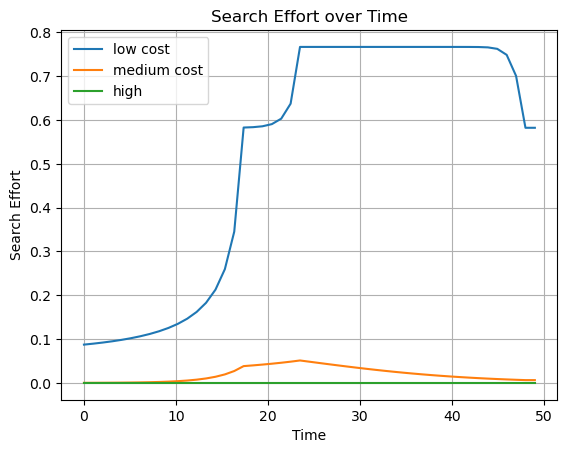

In [34]:
'''Policy Functions'''

search_effort = solve_search_effort(model_new.par)
print(np.shape(search_effort))

time = np.linspace(0, model_new.par.T, model_new.par.T)
plt.plot(time, search_effort[0,:], label = 'low cost') 
plt.plot(time, search_effort[1,:], label = 'medium cost') 
plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


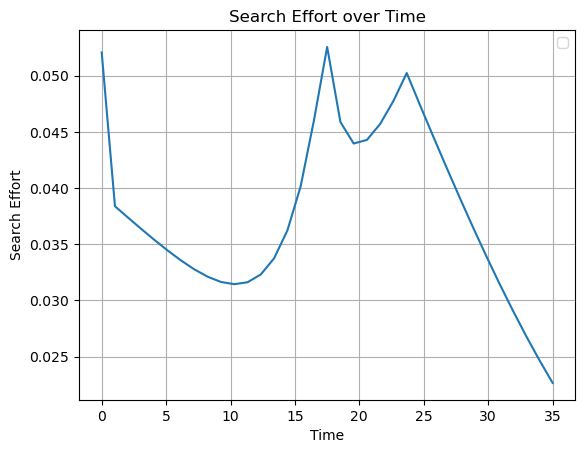

In [35]:
sim_new = sim_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [36]:
model_new.par.b1 = 342.0/675.0
model_new.par.b2 = 171.0/675.0

model_new.allocate()
s_forecast_new = model_new.solve()



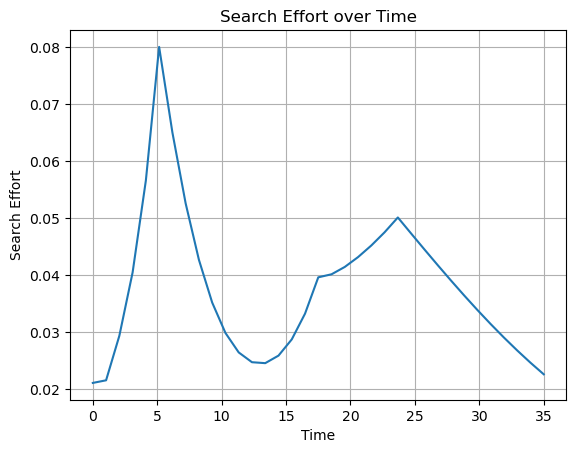

In [37]:
# Now plotting s_forecast
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [38]:
true_data = model_new.data.moments_after
before = model_new.data.moments_before
# print(np.shape(true_data))
# print(np.shape(s_forecast_new))
# Get the mean square errors
mse_eta0 = np.mean((true_data - s_forecast_new)**2)
print(f"Mean-squared error (eta = 0, out-of-sample):        {mse_eta1:.6f}")
print(f"Mean-squared error (eta = 1, out-of-sample):        {mse_eta0:.6f}")

if mse_eta0 < mse_eta1:
    print("The model with eta = 0 is better (out-of-sample)")
else:
    print("The model with eta = 1 is better (out-of-sample)")

mse_eta0_in = np.mean((before - sim_new)**2)
mse_eta1_in = np.mean((before - sim)**2)
print(f"Mean-squared error (eta = 0, in-sample):            {mse_eta1_in:.6f}")
print(f"Mean-squared error (eta = 1, in-sample):            {mse_eta0_in:.6f}")

if mse_eta0_in < mse_eta1_in:
    print("The model with eta = 0 is better (in-sample)")
else:
    print("The model with eta = 1 is better (in-sample)")

Mean-squared error (eta = 0, out-of-sample):        0.000088
Mean-squared error (eta = 1, out-of-sample):        0.000227
The model with eta = 1 is better (out-of-sample)
Mean-squared error (eta = 0, in-sample):            0.000156
Mean-squared error (eta = 1, in-sample):            0.000153
The model with eta = 0 is better (in-sample)


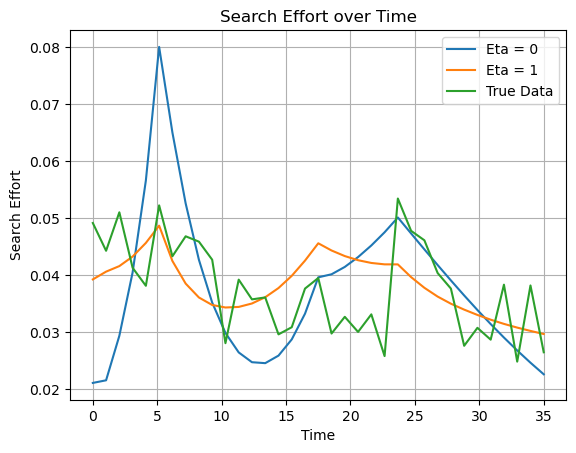

In [39]:
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, label='Eta = 0')
plt.plot(time, s_forecast, label='Eta = 1')
plt.plot(time, true_data, label='True Data')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

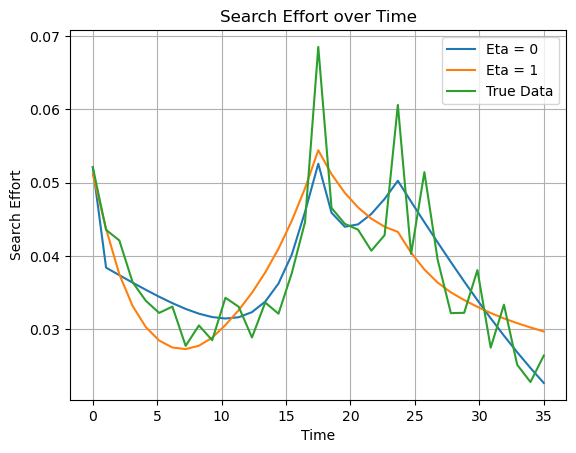

In [40]:
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, label='Eta = 0')
plt.plot(time, sim, label='Eta = 1') 
plt.plot(time, before, label='True Data')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()